In [1]:
from __future__ import print_function
import time

import gzip
import os
import scipy.io
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
# Run CellRanger to generate barcodes.tsv.gz, features.tsv.gz and matrix.mtx.gz 
# Overview of Single Cell Software https://support.10xgenomics.com/single-cell-gene-expression/software/overview/welcome
# Software Downloads https://support.10xgenomics.com/single-cell-gene-expression/software/downloads/latest?
# Cell Ranger Installation: https://support.10xgenomics.com/single-cell-gene-expression/software/pipelines/latest/installation
# Single-Library Analysis with Cell Ranger: https://support.10xgenomics.com/single-cell-gene-expression/software/pipelines/latest/using/count
# Understanding Output: https://support.10xgenomics.com/single-cell-gene-expression/software/pipelines/latest/output/overview

In [2]:
# Open features.tsv to extract feature_ids, gene_names and feature_types, open barcodes.tsv to extract cell_ids

matrix_dir = "filtered_feature_bc_matrix"

features_path = os.path.join(matrix_dir, "features.tsv.gz")

features = pd.read_csv(gzip.open(features_path), header=None, delimiter="\t")
feature_ids = features.iloc[:,0]
print("feature_ids\n", feature_ids.head(), "\n")

gene_names = features.iloc[:,1]
print("gene_names\n", gene_names, "\n")

feature_types = features.iloc[:,2]
print("feature_types\n", feature_types.head(), "\n")

barcodes_path = os.path.join(matrix_dir, "barcodes.tsv.gz")
barcodes = pd.read_csv(gzip.open(barcodes_path), header=None, delimiter="\t")
cell_ids = barcodes[0]

print("barcodes\n", cell_ids)

feature_ids
 0    GRCh38_ENSG00000243485
1    GRCh38_ENSG00000237613
2    GRCh38_ENSG00000186092
3    GRCh38_ENSG00000238009
4    GRCh38_ENSG00000239945
Name: 0, dtype: object 

gene_names
 0           GRCh38_MIR1302-2HG
1               GRCh38_FAM138A
2                 GRCh38_OR4F5
3            GRCh38_AL627309.1
4            GRCh38_AL627309.3
                 ...          
64586        mm10___AC168977.1
64587        mm10___AC149090.1
64588    mm10___CAAA01118383.1
64589          mm10___Vmn2r122
64590    mm10___CAAA01147332.1
Name: 1, Length: 64591, dtype: object 

feature_types
 0    Gene Expression
1    Gene Expression
2    Gene Expression
3    Gene Expression
4    Gene Expression
Name: 2, dtype: object 

barcodes
 0       AAACCTGAGACTGGGT-1
1       AAACCTGAGATATGGT-1
2       AAACCTGAGCCAGGAT-1
3       AAACCTGAGGATGTAT-1
4       AAACCTGAGGGTCGAT-1
               ...        
2605    TTTGTCAAGCTACCTA-1
2606    TTTGTCAAGTTCGATC-1
2607    TTTGTCACATTGTGCA-1
2608    TTTGTCATCATGTCTT-1
2609

In [3]:
# Read matrix.mtx, convert to dense, read into pd.DataFrame, set names for index and columns

mat = scipy.io.mmread(os.path.join(matrix_dir, "matrix.mtx.gz"))
mat_d = mat.todense()

matrix = pd.DataFrame(mat_d, index=gene_names, columns=cell_ids)

matrix.index.set_names("Gene_Name", inplace=True)
matrix.columns.set_names("Cell_ID", inplace=True)

cell_id_gene_exp = matrix

# cell_id_gene_exp.to_hdf("cell_id_gene_exp.h5",key='df',mode='w')
# cell_id_gene_exp.to_csv("cell_id_gene_exp.csv")

cell_id_gene_exp.head()

Cell_ID,AAACCTGAGACTGGGT-1,AAACCTGAGATATGGT-1,AAACCTGAGCCAGGAT-1,AAACCTGAGGATGTAT-1,AAACCTGAGGGTCGAT-1,AAACCTGCACTGCCAG-1,AAACCTGCAGCCAATT-1,AAACCTGTCATGTCCC-1,AAACGGGCAAATCCGT-1,AAAGATGAGTGTTTGC-1,...,TTTGGTTGTGCCTGCA-1,TTTGGTTTCCATGAGT-1,TTTGGTTTCCCGGATG-1,TTTGGTTTCGGCGCAT-1,TTTGGTTTCGGGAGTA-1,TTTGTCAAGCTACCTA-1,TTTGTCAAGTTCGATC-1,TTTGTCACATTGTGCA-1,TTTGTCATCATGTCTT-1,TTTGTCATCCGAACGC-1
Gene_Name,,,,,,,,,,,,,,,,,,,,,
GRCh38_MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GRCh38_FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GRCh38_OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GRCh38_AL627309.1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
GRCh38_AL627309.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Use cellranger mat2csv to convert matrix.mtx to csv 

# convert from MEX
# cellranger mat2csv sample123/outs/filtered_feature_bc_matrix sample123.csv
# or, convert from H5
# cellranger mat2csv sample123/outs/filtered_feature_bc_matrix.h5 sample123.csv

In [6]:
# Read matrix.csv from cellranger into pd.DataFrame, insert gene_names, set names for index and columns, drop feature_ids

# matrix_path = os.path.join(matrix_dir, "matrix.csv")

# matrix = pd.read_csv(matrix_path)
# matrix = pd.read_csv(matrix_path, index_col=0)

# matrix.insert(0, "Gene_Name", gene_names)
# matrix.set_index("Gene_Name", inplace=True)
# matrix.drop(matrix.columns[0], axis=1, inplace=True)

# matrix.to_csv("cell_id_gene_exp.csv")
# print(matrix.head())


In [4]:
# Filter rows with all values are 0 and mosue genes (gene names start with "mm10__")

cge = cell_id_gene_exp

idx = cge[(cge.max(axis=1) == 0) | (cge.index.str[:7] == "mm10___")].index

cge_filtered = cge.drop(idx)

cge_filtered.index = cge_filtered.index.str[7:]

cell_id_gene_exp_filtered = cge_filtered

# cge_filtered.to_hdf("cell_id_gene_exp_filtered.h5")
# cge_filtered.to_csv("cell_id_gene_exp_filtered.csv")

cge_filtered

Cell_ID,AAACCTGAGACTGGGT-1,AAACCTGAGATATGGT-1,AAACCTGAGCCAGGAT-1,AAACCTGAGGATGTAT-1,AAACCTGAGGGTCGAT-1,AAACCTGCACTGCCAG-1,AAACCTGCAGCCAATT-1,AAACCTGTCATGTCCC-1,AAACGGGCAAATCCGT-1,AAAGATGAGTGTTTGC-1,...,TTTGGTTGTGCCTGCA-1,TTTGGTTTCCATGAGT-1,TTTGGTTTCCCGGATG-1,TTTGGTTTCGGCGCAT-1,TTTGGTTTCGGGAGTA-1,TTTGTCAAGCTACCTA-1,TTTGTCAAGTTCGATC-1,TTTGTCACATTGTGCA-1,TTTGTCATCATGTCTT-1,TTTGTCATCCGAACGC-1
Gene_Name,,,,,,,,,,,,,,,,,,,,,
AL627309.1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
AL627309.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL669831.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
LINC00115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
FAM41C,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC007325.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC007325.4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
AL354822.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Prepare for demultiplex of MULTI-Seq labeling

# Step 1: Remove "-1" at the end of cell_ids to use it for deMULTIplex (https://github.com/chris-mcginnis-ucsf/MULTI-seq)

# Method #1
"""
cids = []
for sq in cell_ids:
    cid = str(sq)[:16]
    cids.append(cid)

df_cid = pd.Series(cids)
"""

# Method #2
"""
df_cid = cell_ids.apply(lambda x: x[:16])
"""

# Method #3 -- The Best

df_cid = cell_ids.str[:16]

df_cid.to_csv("cell_id.txt", header=False, index=False, sep=' ', mode='w')

df_cid.head()

0    AAACCTGAGACTGGGT
1    AAACCTGAGATATGGT
2    AAACCTGAGCCAGGAT
3    AAACCTGAGGATGTAT
4    AAACCTGAGGGTCGAT
Name: 0, dtype: object

In [6]:
# Use the MULTI-seq_R1.fastq.gz and _R2.fastq.gz and cell_id.txt to run the R package deMULTIplex, save the readTable as readtable_raw.csv

# Replace N in the sample column with "ATGC" in multi-seq barcodes of readtable_raw.csv, and save as readTable.csv

"""
bar.ref <- scan('~/scRNA/bar.txt', character(), quote = "")
str(bar.ref)

cell_id.vec <- scan('~/scRNA/cell_id.txt', character(), quote = "")
str(cell_id.vec)

readTable <- MULTIseq.preProcess(R1 = '~/scRNA/MULTI-seq_1_R1.fastq.gz', R2 = '~/scRNA/MULTI-seq_1_R2.fastq.gz', cellIDs = cell_id.vec, cell=c(1,16), umi=c(17,28), tag=c(1,8))

bar.table <- MULTIseq.align(readTable, cell_id.vec, bar.ref)
"""

df_msrt = pd.read_csv('readtable_raw.csv', index_col=0)

# Method 1
"""
rp = []

for bar in df_msrt["Sample"]:
    if bar == "NCACACGC":
        bar = "GCACACGC"
    if bar == "NGAGAAGA":
        bar = "GGAGAAGA"
    if bar == "NCACAATG":
        bar = "CCACAATG"
    if bar == "NGAGACCT":
        bar = "TGAGACCT"
    rp.append(bar)

df_msrt["Sample"] = rp
"""
# Method 2a

bar_rpl = {'NCACACGC':'GCACACGC', 'NGAGAAGA':'GGAGAAGA', 'NCACAATG':'CCACAATG', 'NGAGACCT':'TGAGACCT'}

df_msrt['Sample'] = df_msrt['Sample'].replace(bar_rpl)

# Method 2b

# df_msrt['Sample'] = df_msrt['Sample'].replace(['NCACACGC','NGAGAAGA','NCACAATG','NGAGACCT'],['GCACACGC','GGAGAAGA','CCACAATG','TGAGACCT'])

# df_msrt.to_csv("readTable.csv")

df_msrt.head()

,Cell,UMI,Sample
11,AGCTCCTCATGCCTTC,TGTCTTAGAGTA,GCACACGC
13,GAACATCTCATGTAGC,ATGCAGAGTAGA,GGAGAAGA
17,TAAGCGTAGACTCGGA,GTGGTAGCATTT,CCACAATG
18,CCGTTCACATGGTCAT,CATTGCCTGGTA,GCACACGC
21,CTGATAGTCAGCTCGG,TGAAAGTCGGCT,GGAGAAGA


In [7]:
# Use bar.table <- MULTIseq.align(readTable, cell_id.vec, bar.ref) to generate a table of cell_id, barcodes and counts and  save it as cell_id_bars.csv

# Restore "-1" at the end of cell_id in the cell_id_bars table

df_bar = pd.read_csv("cell_id_bars.csv")

df_bar.iloc[:,0] = df_bar.iloc[:,0].str[:] + "-1"

df_bar.rename(columns={"Unnamed: 0":"cell_id"}, inplace=True)

df_bar.set_index("cell_id", inplace=True)

cb = df_bar.iloc[:, :4]

df_cell_id_bars = cb[cb.max(axis=1)>0] # Filter cells with reads for all bars are 0

# df_cell_id_bars.to_excel('cell_id_bars_table.xlsx')

df_cell_id_bars.head()

,Bar1,Bar2,Bar3,Bar4
cell_id,,,,
AAACCTGAGACTGGGT-1,25,2865,23,36
AAACCTGAGCCAGGAT-1,25,16,1824,41
AAACCTGAGGATGTAT-1,21,9,375,22
AAACCTGAGGGTCGAT-1,20,4348,93,58
AAACCTGCACTGCCAG-1,10,12,64,36


In [8]:
# find the top two in each row of the cell_id in the cell_id_bars table

"""
df_nlargest = pd.DataFrame({n: df_ms1_cb.T[col].nlargest(2).index.tolist() 
                            for n, col in enumerate(df_ms1_cb.T)}).T
"""

df_T = df_cell_id_bars.T

# df_nlargest = pd.DataFrame({col: df_T.loc[(df_T[col].nlargest(2).index), col].reset_index(drop=True) for col in df_T.columns}).T

df_nlargest = pd.DataFrame({col: df_T[col].nlargest(2).index for col in df_T.columns}, index=["L-bar", "2nd-bar"]).T

df_nlargest.index.set_names(['cell_id'], inplace=True)

# df_nlargest.to_excel("cell_id_bars_top2.xlsx")

df_nlargest.head()

,L-bar,2nd-bar
cell_id,,
AAACCTGAGACTGGGT-1,Bar2,Bar4
AAACCTGAGCCAGGAT-1,Bar3,Bar4
AAACCTGAGGATGTAT-1,Bar3,Bar4
AAACCTGAGGGTCGAT-1,Bar2,Bar3
AAACCTGCACTGCCAG-1,Bar3,Bar4


In [9]:
# Remove rows in cell_id_bars_top2 table with max == 0 and Largest/2nd_Largest <3, pick up top1 barcode associated with cell_id

df1 = df_cell_id_bars
df2 = df_nlargest

df2_filtered = pd.DataFrame(columns= ["L-bar"]) # Create an empty filtered DataFrame

for idx in df2.index:
    Lg = df2.loc[idx, "L-bar"]
    Lo = df2.loc[idx, "2nd-bar"]
    Lgn = df1.loc[idx, Lg]
    Lon = df1.loc[idx,Lo]

    if (Lon == 0 and Lgn > 0) or (Lon > 0 and Lgn/Lon > 20):
        df2_filtered.loc[idx, "L-bar"] = Lg # Add matched value to filtered DataFrame

df2_filtered.index.set_names(['cell_id'], inplace=True)

cell_id_bars_top1 = df2_filtered.sort_values(by="L-bar")

# cell_id_bars_top1.to_excel("cell_id_bars_top1.xlsx")

cell_id_bars_top1.head()

,L-bar
cell_id,
GGACGTCGTCTCCCTA-1,Bar1
GATCGATGTCTCCATC-1,Bar1
GCACATATCCGCATAA-1,Bar1
GCAGTTACAGATCGGA-1,Bar1
GCATACATCCTACAGA-1,Bar1


In [10]:
# Refilter matrix_filtered (cell_id_gene_exp_filtered) with cell ids in top1 barcodes (cell_id_bars_top1)

cge_f = cell_id_gene_exp_filtered

cge_2f = cge_f[cell_id_bars_top1.index]

cell_id_gene_exp_2nd_filtered = cge_2f

# cell_id_gene_exp_2nd_filtered.to_csv('cell_id_gene_exp_2nd_filtered.csv')

cell_id_gene_exp_2nd_filtered

Cell_ID,GGACGTCGTCTCCCTA-1,GATCGATGTCTCCATC-1,GCACATATCCGCATAA-1,GCAGTTACAGATCGGA-1,GCATACATCCTACAGA-1,GCATGATAGGTAAACT-1,GCATGTATCGGAGGTA-1,GCCAAATTCGTCGTTC-1,AGTGGGAGTTCCGGCA-1,GCGAGAATCACCTCGT-1,...,CACAGTAGTGACTCAT-1,CGGAGTCAGGATGTAT-1,GGGTCTGAGATATGCA-1,TCGCGTTGTTGATTGC-1,CACAGGCCACATCCAA-1,CGGAGTCGTACATGTC-1,TCGCGAGGTTCCGGCA-1,ATCATCTGTTTAGGAA-1,GAATGAACATGGTAGG-1,CAAGTTGAGGCCCTTG-1
Gene_Name,,,,,,,,,,,,,,,,,,,,,
AL627309.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL669831.5,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
LINC00115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM41C,0,0,0,0,0,0,0,0,0,2,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC007325.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC007325.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL354822.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Further filter cells with all genes' expression are 0, ie., no gene is detected in this cell
# Method 1

cge_2f_max0 = cge_2f.max(axis=0)>200
cge_3f_col = cge_2f_max0[cge_2f_max0==True].index
cge_3f = cge_2f[cge_3f_col]

cell_id_gene_exp_3rd_filtered = cge_3f

# cell_id_gene_exp_3rd_filtered.to_csv('cell_id_gene_exp_3rd_filtered.csv')

cell_id_gene_exp_3rd_filtered.head()

Cell_ID,GGACGTCGTCTCCCTA-1,GATCGATGTCTCCATC-1,GCACATATCCGCATAA-1,GCATACATCCTACAGA-1,GCATGATAGGTAAACT-1,GCATGTATCGGAGGTA-1,GCCAAATTCGTCGTTC-1,AGTGGGAGTTCCGGCA-1,GCGAGAATCACCTCGT-1,GCGCAACGTTGGAGGT-1,...,CGGCTAGGTCTGGAGA-1,CACAGTAGTGACTCAT-1,CGGAGTCAGGATGTAT-1,GGGTCTGAGATATGCA-1,TCGCGTTGTTGATTGC-1,CACAGGCCACATCCAA-1,CGGAGTCGTACATGTC-1,ATCATCTGTTTAGGAA-1,GAATGAACATGGTAGG-1,CAAGTTGAGGCCCTTG-1
Gene_Name,,,,,,,,,,,,,,,,,,,,,
AL627309.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL669831.5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
LINC00115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM41C,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
# Further filter cells with all genes' expression are 0, ie., no gene is detected in this cell
# Method 2

""""
cge_2f_T = cell_id_gene_exp_2nd_filtered.T

cge_3f = cge_2f_T[cge_2f_T.max(axis=1)>0].T

cell_id_gene_exp_3rd_filtered = cge_3f

print(cge_3f.head())
"""

'"\ncge_2f_T = cell_id_gene_exp_2nd_filtered.T\n\ncge_3f = cge_2f_T[cge_2f_T.max(axis=1)>0].T\n\ncell_id_gene_exp_3rd_filtered = cge_3f\n\nprint(cge_3f.head())\n'

In [13]:
# Refilter cell_id_bars_top1 based on cell_id_gene_exp_3rd_filtered (cge_3f)

idx_top1 = cell_id_gene_exp_3rd_filtered.columns

cell_id_bars_top1_filtered = cell_id_bars_top1.loc[idx_top1, :]

# cell_id_bars_top1_filtered.to_excel('cell_id_bars_top1_filtered.xlsx')

cell_id_bars_top1_filtered.head()

,L-bar
Cell_ID,
GGACGTCGTCTCCCTA-1,Bar1
GATCGATGTCTCCATC-1,Bar1
GCACATATCCGCATAA-1,Bar1
GCATACATCCTACAGA-1,Bar1
GCATGATAGGTAAACT-1,Bar1


In [14]:
# Create a Dict and make a nested array to assign cell_id to different Barcodes

cbt1f = cell_id_bars_top1_filtered

bars = ["Bar1", "Bar2", "Bar3", "Bar4"]

# Method 1
"""
cell_id_dict = {}
cell_id_bar = []

for bar in bars:
    cell_id_dict[bar] = cbt1f[cbt1f["L-bar"] == bar].index.tolist()
    cell_id_bar.append(cell_id_dict[bar])
"""

# Method 2

cell_id_arr = [cbt1f[cbt1f["L-bar"] == bar].index.tolist() for bar in bars]

cell_id_arr[0][:5]


['GGACGTCGTCTCCCTA-1',
 'GATCGATGTCTCCATC-1',
 'GCACATATCCGCATAA-1',
 'GCATACATCCTACAGA-1',
 'GCATGATAGGTAAACT-1']

In [15]:
# Add multiindex to cell_ids

cbt1f = cell_id_bars_top1_filtered

df_cge_3f = cell_id_gene_exp_3rd_filtered

pds = ["PD12", "PD17", "PD24", "PD33"]

L = len(bars)

Ls = []
Lb = []

for b in range(L):
    len_cid = len(cell_id_arr[b])
    Ls += [b]*len_cid
    Lb.append(len_cid)

Tl = sum(Lb)

print(Lb,Tl)

midx = pd.MultiIndex(levels=[pds, cbt1f.index.to_list()], codes=[Ls, range(Tl)])

df_cge_3f.columns = midx

cell_id_gene_exp_3rd_filtered_midx = df_cge_3f

# cell_id_gene_exp_3rd_filtered_midx.to_csv("cell_id_gene_exp_3rd_filtered_midx.csv")

cell_id_gene_exp_3rd_filtered_midx

[230, 274, 725, 242] 1471


PD12                                        \
           GGACGTCGTCTCCCTA-1 GATCGATGTCTCCATC-1 GCACATATCCGCATAA-1   
Gene_Name                                                             
AL627309.1                  0                  0                  0   
AL627309.3                  0                  0                  0   
AL669831.5                  0                  0                  0   
LINC00115                   0                  0                  0   
FAM41C                      0                  0                  0   
...                       ...                ...                ...   
AC007325.1                  0                  0                  0   
AC007325.4                  0                  0                  0   
AL354822.1                  0                  0                  0   
AC004556.1                  1                  0                  0   
AC240274.1                  1                  1                  0   

                                                                     \
           GCATACATCCTACAGA-1 GCATGATAGGTAAACT-1 GCATGTATCGGAGGTA-1   
Gene_Name                                                             
AL627309.1                  0                  0                  0   
AL627309.3                  0                  0                  0   
AL669831.5                  0                  0                  0   
LINC00115                   0                  0                  0   
FAM41C                      0                  0                  0   
...                       ...                ...                ...   
AC007325.1                  0                  0                  0   
AC007325.4                  0                  0                  0   
AL354822.1                  0                  0                  0   
AC004556.1                  0                  0                  0   
AC240274.1                  0                  0                  0   

                                                                     \
           GCCAAATTCGTCGTTC-1 AGTGGGAGTTCCGGCA-1 GCGAGAATCACCTCGT-1   
Gene_Name                                                             
AL627309.1                  0                  0                  0   
AL627309.3                  0                  0                  0   
AL669831.5                  1                  0                  0   
LINC00115                   0                  0                  0   
FAM41C                      0                  0                  2   
...                       ...                ...                ...   
AC007325.1                  0                  0                  0   
AC007325.4                  0                  0                  0   
AL354822.1                  0                  0                  0   
AC004556.1                  0                  0                  0   
AC240274.1                  0                  0                  0   

                               ...               PD33                     \
           GCGCAACGTTGGAGGT-1  ... CGGCTAGGTCTGGAGA-1 CACAGTAGTGACTCAT-1   
Gene_Name                      ...                                         
AL627309.1                  0  ...                  0                  0   
AL627309.3                  0  ...                  0                  0   
AL669831.5                  0  ...                  0                  0   
LINC00115                   0  ...                  0                  0   
FAM41C                      0  ...                  0                  0   
...                       ...  ...                ...                ...   
AC007325.1                  0  ...                  0                  0   
AC007325.4                  0  ...                  0                  0   
AL354822.1                  0  ...                  0                  0   
AC004556.1                  0  ...                  0                  0   
AC240274.1                  1  ...                  

In [16]:
# Calculate normalized expression x1000000 for each passage cells

cge_3f_m = cell_id_gene_exp_3rd_filtered_midx

df_gene_sum = cge_3f_m.sum(axis=0)

df_nr = cge_3f_m/df_gene_sum*1000000

# df_nr.to_hdf("normalized_exp.h5",key='df',mode='w')
# df_nr.to_csv("normalized_exp.csv")

# df_nr.T.to_csv('normalized_exp_T.csv')

df_nr

PD12                                        \
           GGACGTCGTCTCCCTA-1 GATCGATGTCTCCATC-1 GCACATATCCGCATAA-1   
Gene_Name                                                             
AL627309.1           0.000000           0.000000                0.0   
AL627309.3           0.000000           0.000000                0.0   
AL669831.5           0.000000           0.000000                0.0   
LINC00115            0.000000           0.000000                0.0   
FAM41C               0.000000           0.000000                0.0   
...                       ...                ...                ...   
AC007325.1           0.000000           0.000000                0.0   
AC007325.4           0.000000           0.000000                0.0   
AL354822.1           0.000000           0.000000                0.0   
AC004556.1          23.403309           0.000000                0.0   
AC240274.1          23.403309          20.079918                0.0   

                                                                     \
           GCATACATCCTACAGA-1 GCATGATAGGTAAACT-1 GCATGTATCGGAGGTA-1   
Gene_Name                                                             
AL627309.1                0.0                0.0                0.0   
AL627309.3                0.0                0.0                0.0   
AL669831.5                0.0                0.0                0.0   
LINC00115                 0.0                0.0                0.0   
FAM41C                    0.0                0.0                0.0   
...                       ...                ...                ...   
AC007325.1                0.0                0.0                0.0   
AC007325.4                0.0                0.0                0.0   
AL354822.1                0.0                0.0                0.0   
AC004556.1                0.0                0.0                0.0   
AC240274.1                0.0                0.0                0.0   

                                                                     \
           GCCAAATTCGTCGTTC-1 AGTGGGAGTTCCGGCA-1 GCGAGAATCACCTCGT-1   
Gene_Name                                                             
AL627309.1            0.00000                0.0           0.000000   
AL627309.3            0.00000                0.0           0.000000   
AL669831.5           23.39236                0.0           0.000000   
LINC00115             0.00000                0.0           0.000000   
FAM41C                0.00000                0.0          43.944454   
...                       ...                ...                ...   
AC007325.1            0.00000                0.0           0.000000   
AC007325.4            0.00000                0.0           0.000000   
AL354822.1            0.00000                0.0           0.000000   
AC004556.1            0.00000                0.0           0.000000   
AC240274.1            0.00000                0.0           0.000000   

                               ...               PD33                     \
           GCGCAACGTTGGAGGT-1  ... CGGCTAGGTCTGGAGA-1 CACAGTAGTGACTCAT-1   
Gene_Name                      ...                                         
AL627309.1           0.000000  ...                0.0                0.0   
AL627309.3           0.000000  ...                0.0                0.0   
AL669831.5           0.000000  ...                0.0                0.0   
LINC00115            0.000000  ...                0.0                0.0   
FAM41C               0.000000  ...                0.0                0.0   
...                       ...  ...                ...                ...   
AC007325.1           0.000000  ...                0.0                0.0   
AC007325.4           0.000000  ...                0.0                0.0   
AL354822.1           0.000000  ...                0.0                0.0   
AC004556.1           0.000000  ...                0.0                0.0   
AC240274.1          26.701557  ...                0.

In [17]:
# Calculate mean of normalized gene expression x1000000 for each passage cells

df_avr = df_nr.groupby(level=0, axis=1).mean()

# df_avr.to_excel('mean_exp.xlsx')

df_avr

,PD12,PD17,PD24,PD33
Gene_Name,,,,
AL627309.1,0.822501,0.460784,0.103996,0.270472
AL627309.3,0.000000,0.000000,0.051494,0.000000
AL669831.5,2.831637,3.643483,4.445453,3.205632
LINC00115,2.010561,1.706786,0.847953,1.104185
FAM41C,4.310506,4.127813,3.934780,3.818699
...,...,...,...,...
AC007325.1,0.224075,0.000000,0.027703,0.000000
AC007325.4,1.147037,0.679881,0.705383,1.161245
AL354822.1,0.000000,0.082687,0.042032,0.000000


In [18]:
# Calculate standard deviation of the average value

df_avr_std = df_nr.groupby(level=0, axis=1).std()

# df_avr_std.to_excel('std.xlsx')

df_avr_std.head()

,PD12,PD17,PD24,PD33
Gene_Name,,,,
AL627309.1,6.678971,3.921836,1.623272,2.969050
AL627309.3,0.000000,0.000000,1.386510,0.000000
AL669831.5,9.162198,10.434289,12.937350,10.296952
LINC00115,7.939642,7.358954,5.065714,6.078830
FAM41C,10.733933,10.301444,12.605651,11.145812


In [19]:
# Calculate unbiased variance of the average value

df_avr_var = df_nr.groupby(level=0, axis=1).var()

# df_avr_var.to_excel('variance.xlsx')

df_avr_var.head()

,PD12,PD17,PD24,PD33
Gene_Name,,,,
AL627309.1,44.608659,15.380801,2.635010,8.815258
AL627309.3,0.000000,0.000000,1.922411,0.000000
AL669831.5,83.945872,108.874388,167.375028,106.027212
LINC00115,63.037908,54.154202,25.661456,36.952171
FAM41C,115.217326,106.119738,158.902437,124.229121


In [20]:
# Run T-TEST to get p-val for PD12 and PD33

b1 = Lb[0]
b4s = sum(Lb[:3])
b4e = sum(Lb)

t_test = {i: scipy.stats.ttest_ind(df_nr.iloc[i,:b1], df_nr.iloc[i,b4s:b4e], axis=0, equal_var=False, nan_policy="omit") for i in range(len(df_nr.index))}

df_t_test = pd.DataFrame(t_test).T

df_t_test.index = df_nr.index
df_t_test.columns = ["statistic","pval"]

# df_t_test.to_excel('t_test.xlsx')

df_t_test

,statistic,pval
Gene_Name,,
AL627309.1,1.150116,0.250975
AL627309.3,NaN,NaN
AL669831.5,-0.417329,0.676629
LINC00115,1.387426,0.166033
FAM41C,0.488331,0.625544
...,...,...
AC007325.1,1.400574,0.162695
AC007325.4,-0.025086,0.979998
AL354822.1,NaN,NaN


In [21]:
"""
# Run T-TEST to get p-val, Note: Errors occurs because of duplications of index

t_test = {i: scipy.stats.ttest_ind(df_nr.loc[i,"PD12"], df_nr.loc[i,"PD33"], axis=0, equal_var=False, nan_policy="omit") for i in df_nr.index}

df_t_test= pd.DataFrame(t_test, index=["statistic", "pval"])
    
df_t_test_T = df_t_test.T

df_t_test_T
"""    

'\n# Run T-TEST to get p-val, Note: Errors occurs because of duplications of index\n\nt_test = {i: scipy.stats.ttest_ind(df_nr.loc[i,"PD12"], df_nr.loc[i,"PD33"], axis=0, equal_var=False, nan_policy="omit") for i in df_nr.index}\n\ndf_t_test= pd.DataFrame(t_test, index=["statistic", "pval"])\n    \ndf_t_test_T = df_t_test.T\n\ndf_t_test_T\n'

In [22]:
# Merge mean, statistic and pval

df_avr_12_33 = df_avr.loc[:,["PD12","PD33"]]
df_avr_12_33[["statistic","pval"]] = df_t_test[["statistic","pval"]]

# df_avr_12_33.to_excel("pd_12_33_mean_pval.xlsx")

df_avr_12_33.head()

,PD12,PD33,statistic,pval
Gene_Name,,,,
AL627309.1,0.822501,0.270472,1.150116,0.250975
AL627309.3,0.000000,0.000000,NaN,NaN
AL669831.5,2.831637,3.205632,-0.417329,0.676629
LINC00115,2.010561,1.104185,1.387426,0.166033
FAM41C,4.310506,3.818699,0.488331,0.625544


In [23]:
# Select Exp_PD12/Exp_PD33 > 4 and pval < 0.05 genes

pd33_0 = df_avr_12_33["PD33"] == 0
ratio_12 = df_avr_12_33["PD12"]/0.05 >= 4  # if pd33 = 0, then pd33 = 0.05 for calculation

ratio_12_33 = df_avr_12_33["PD12"]/df_avr_12_33["PD33"] >= 4
pd33_n0 = df_avr_12_33["PD33"] > 0

pval = df_avr_12_33["pval"] < 0.05

df_pd12_h = df_avr_12_33[(ratio_12_33 & pd33_n0 & pval) | (ratio_12 & pd33_0 & pval)]

# df_pd12_h = df_avr_12_33[pval] # for all genes with pval < 0.05

# df_pd12_h.to_excel("pd12_4h.xlsx")

df_pd12_h

,PD12,PD33,statistic,pval
Gene_Name,,,,
AL645608.3,0.680548,0.000000,2.462130,0.014550
ANKRD65,0.706383,0.000000,2.462153,0.014549
RAB42,1.269464,0.144438,2.528425,0.012003
TINAGL1,1.326533,0.000000,3.274297,0.001223
AL603840.1,0.937534,0.084879,2.473110,0.014038
...,...,...,...,...
NEFH,1.557367,0.249672,3.021352,0.002719
AC003681.1,0.830781,0.088335,2.042197,0.042150
BAIAP2L2,1.503321,0.000000,3.419773,0.000742


In [24]:
# Select Exp_PD33/Exp_PD12 > 4 and pval < 0.05 genes

pd12_0 = df_avr_12_33["PD12"] == 0
ratio_33 = df_avr_12_33["PD33"]/0.05 >= 4  # if pd12 = 0, then pd12 = 0.05 for calculation

ratio_33_12 = df_avr_12_33["PD33"]/df_avr_12_33["PD12"] >= 4
pd12_n0 = df_avr_12_33["PD12"] > 0

pval = df_avr_12_33["pval"] < 0.05

df_pd33_h = df_avr_12_33[(ratio_33_12 & pd12_n0 & pval) | (ratio_33 & pd12_0 & pval)]

# df_pd33_h = df_avr_12_33[pval] # for all genes with pval < 0.05

# df_pd33_h.to_excel("pd33_4h.xlsx")

df_pd33_h

,PD12,PD33,statistic,pval
Gene_Name,,,,
HSPB7,1.780027,18.493701,-5.748972,2.446911e-08
FAM43B,0.000000,0.627517,-2.239288,2.605016e-02
AL031432.3,0.000000,0.583567,-2.001764,4.643105e-02
FGR,0.000000,0.480858,-2.000937,4.652074e-02
SGIP1,25.160385,108.263007,-5.250815,3.143163e-07
...,...,...,...,...
CLDN5,0.000000,0.741679,-2.449872,1.500318e-02
LARGE1,0.700286,4.033391,-3.781823,1.880581e-04
SHANK3,0.110494,0.797100,-2.136327,3.345071e-02


In [25]:
# Extract information for a subset genes (here are trnascription factors) from above 

tf = pd.read_excel('tf_list.xlsx')

nr_gene = df_nr.index

nr_tf = list(set(tf['gene']).intersection(set(nr_gene)))

h_pd12 = df_pd12_h.index

h_pd12_tf = list(set(tf['gene']).intersection(set(h_pd12)))

h_pd33 = df_pd33_h.index

h_pd33_tf = list(set(tf['gene']).intersection(set(h_pd33)))

df_tf = {}

keys = ['nr','avr','std','var','t_test','avr_12_33','pd12_h', 'pd33_h']

fns = ['normalized_exp','mean_exp','std','var','t_test','pd_12_33_mean_pval','pd12_4h','pd33_4h']

ori = [df_nr, df_avr, df_avr_std, df_avr_var, df_t_test, df_avr_12_33, df_pd12_h, df_pd33_h]

for i in range(len(keys)):

    if keys[i] == 'pd12_h':
        idx = h_pd12_tf
    elif keys[i] == 'pd33_h':
        idx = h_pd33_tf
    else:
        idx = nr_tf

    df_tf[keys[i]] = ori[i].loc[idx,:]

    # df_tf[keys[i]].to_excel(fns[i] + '_tf.xlsx')

    print(fns[i]+'_tf', '\n', df_tf[keys[i]].head(), '\n')

normalized_exp_tf 
                         PD12                                        \
          GGACGTCGTCTCCCTA-1 GATCGATGTCTCCATC-1 GCACATATCCGCATAA-1   
Gene_Name                                                            
ZNF14               0.000000                0.0                0.0   
GATA6               0.000000                0.0                0.0   
NFE2L1             23.403309                0.0                0.0   
SOX15               0.000000                0.0                0.0   
KLF14               0.000000                0.0                0.0   

                                                                    \
          GCATACATCCTACAGA-1 GCATGATAGGTAAACT-1 GCATGTATCGGAGGTA-1   
Gene_Name                                                            
ZNF14                    0.0                0.0            0.00000   
GATA6                    0.0                0.0            0.00000   
NFE2L1                   0.0                0.0           29.28858   

In [26]:
# Extract information for a subset genes (here are Cell Senescence-Associated Genes) from above 

csg = pd.read_excel('CellSG.xlsx')

nr_gene = df_nr.index

nr_csg = list(set(csg['Gene Name']).intersection(set(nr_gene)))

h_pd12 = df_pd12_h.index

h_pd12_csg = list(set(csg['Gene Name']).intersection(set(h_pd12)))

h_pd33 = df_pd33_h.index

h_pd33_csg = list(set(csg['Gene Name']).intersection(set(h_pd33)))

df_csg = {}

keys = ['nr','avr','std','var','t_test','avr_12_33','pd12_h', 'pd33_h']

fns = ['normalized_exp','mean_exp','std','var','t_test','pd_12_33_mean_pval','pd12_4h','pd33_4h']

ori = [df_nr, df_avr, df_avr_std, df_avr_var, df_t_test, df_avr_12_33, df_pd12_h, df_pd33_h]

for i in range(len(keys)):

    if keys[i] == 'pd12_h':
        idx = h_pd12_csg
    elif keys[i] == 'pd33_h':
        idx = h_pd33_csg
    else:
        idx = nr_csg

    df_csg[keys[i]] = ori[i].loc[idx,:]

    # df_csg[keys[i]].to_excel(fns[i] + '_csg.xlsx')

    print(fns[i]+'_csg', '\n', df_csg[keys[i]].head(), '\n')

normalized_exp_csg 
                         PD12                                        \
          GGACGTCGTCTCCCTA-1 GATCGATGTCTCCATC-1 GCACATATCCGCATAA-1   
Gene_Name                                                            
MAP3K6              0.000000           0.000000           0.000000   
MATK                0.000000           0.000000           0.000000   
MAPK12             70.209928          20.079918           0.000000   
CKB                23.403309          80.319672          23.743382   
CYR61             351.049638         562.237706         237.433815   

                                                                    \
          GCATACATCCTACAGA-1 GCATGATAGGTAAACT-1 GCATGTATCGGAGGTA-1   
Gene_Name                                                            
MAP3K6              0.000000          29.711501           0.000000   
MATK                0.000000           0.000000           0.000000   
MAPK12              0.000000          29.711501          58.577161  

In [27]:
# Extract information for a subset genes (here are Cell Surface Proteins) from above 

csg = pd.read_excel('hCSP.xlsx')

nr_gene = df_nr.index

nr_csp = list(set(csg['Gene']).intersection(set(nr_gene)))

h_pd12 = df_pd12_h.index

h_pd12_csp = list(set(csg['Gene']).intersection(set(h_pd12)))

h_pd33 = df_pd33_h.index

h_pd33_csp = list(set(csg['Gene']).intersection(set(h_pd33)))

df_csp = {}

keys = ['nr','avr','std','var','t_test','avr_12_33','pd12_h', 'pd33_h']

fns = ['normalized_exp','mean_exp','std','var','t_test','pd_12_33_mean_pval','pd12_4h','pd33_4h']

ori = [df_nr, df_avr, df_avr_std, df_avr_var, df_t_test, df_avr_12_33, df_pd12_h, df_pd33_h]

for i in range(len(keys)):

    if keys[i] == 'pd12_h':
        idx = h_pd12_csp
    elif keys[i] == 'pd33_h':
        idx = h_pd33_csp
    else:
        idx = nr_csp

    df_csp[keys[i]] = ori[i].loc[idx,:]

    # df_csp[keys[i]].to_excel(fns[i] + '_csp.xlsx')

    print(fns[i]+'_csp', '\n', df_csp[keys[i]].head(), '\n')

normalized_exp_csp 
                         PD12                                        \
          GGACGTCGTCTCCCTA-1 GATCGATGTCTCCATC-1 GCACATATCCGCATAA-1   
Gene_Name                                                            
BTN3A3              0.000000           0.000000           0.000000   
CD58                0.000000           0.000000           0.000000   
VDAC2             421.259566         180.719263         213.690434   
VASN               70.209928           0.000000          47.486763   
OLFML2A             0.000000          20.079918           0.000000   

                                                                    \
          GCATACATCCTACAGA-1 GCATGATAGGTAAACT-1 GCATGTATCGGAGGTA-1   
Gene_Name                                                            
BTN3A3              0.000000           0.000000           0.000000   
CD58                0.000000           0.000000           0.000000   
VDAC2             212.833883         207.980509         117.154322  

In [28]:
df_csp['pd12_h'].sort_values(by='pval')

,PD12,PD33,statistic,pval
Gene_Name,,,,
LY6K,354.309074,38.573736,12.362331,9.162771e-28
APOD,93.523511,12.586625,6.633142,2.133579e-10
SLC38A1,11.544942,1.119572,5.704529,2.516647e-08
FBN2,59.836874,14.126258,5.346533,1.807884e-07
HHIP,5.149220,0.125657,4.883713,1.920501e-06
MFAP5,20.568918,1.028066,4.839391,2.301920e-06
ISLR,3.970504,0.127767,4.812075,2.636045e-06
ADRB2,5.956498,1.119115,4.534001,8.316000e-06
SLC6A15,4.257456,0.342811,4.474147,1.158796e-05


In [29]:
df_csp['pd33_h'].sort_values(by='pval')

,PD12,PD33,statistic,pval
Gene_Name,,,,
CPM,10.757743,43.930769,-8.998169,2.108432e-17
LAMB3,4.190953,18.287531,-7.227369,2.910755e-12
NRP2,2.794690,14.670407,-5.839092,1.293922e-08
HSD11B1,3.112171,13.021493,-4.222830,3.028956e-05
LAMA2,1.052139,5.688744,-3.987450,8.346474e-05
BVES,0.559657,2.886827,-2.688889,7.568887e-03
ITGA11,0.000000,0.902918,-2.607329,9.694519e-03
LRRC15,0.000000,0.775096,-2.444165,1.523664e-02
BST2,0.000000,0.596991,-2.226144,2.692983e-02


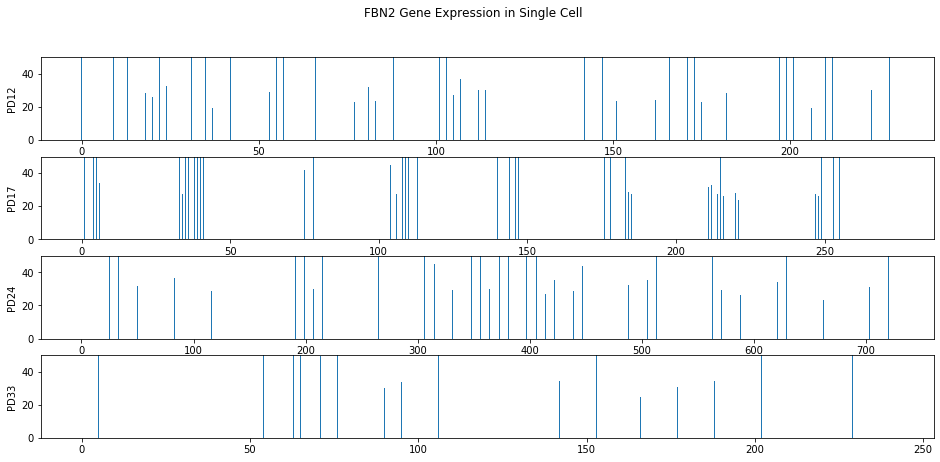

In [30]:
# Plot normalized gene expression in single cell (df_nr) with Exp_PD12/Exp_PD33 >= 15 and pval <0.05 (df_pd12_h)

gene = 'FBN2'

title = gene + ' ' + 'Gene Expression in Single Cell'

df_nr_f = df_nr.loc[gene, :]

ymax = 50

plt.figure(figsize=(16,7))
plt.subplot(411)
plt.bar(range(Lb[0]),df_nr_f[pds[0]].tolist(), width=0.1)
plt.ylim(0,ymax)
plt.ylabel(pds[0])
plt.subplot(412)
plt.bar(range(Lb[1]),df_nr_f[pds[1]].tolist(), width=0.1)
plt.ylim(0,ymax)
plt.ylabel(pds[1])
plt.subplot(413)
plt.bar(range(Lb[2]),df_nr_f[pds[2]].tolist(), width=0.1)
plt.ylim(0,ymax)
plt.ylabel(pds[2])
plt.subplot(414)
plt.bar(range(Lb[3]),df_nr_f[pds[3]].tolist(), width=0.1)
plt.ylim(0,ymax)
plt.ylabel(pds[3])
plt.suptitle(title)
plt.show()

In [31]:
# Assign colors and labels for different groups

y = Ls
df_nr_T = df_nr.T
df_nr_T['y'] = y        # Assign colors
df_nr_T['label'] = y    # Assign labels
df_nrt = df_nr_T.reset_index(drop=True)

# df_nr_T.to_csv("df_nr_T.csv", index=False)

df_nrt.head()

Gene_Name,AL627309.1,AL627309.3,AL669831.5,LINC00115,FAM41C,AL645608.7,AL645608.3,AL645608.1,SAMD11,NOC2L,...,MAFIP,AC011043.1,AL592183.1,AC007325.1,AC007325.4,AL354822.1,AC004556.1,AC240274.1,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.403309,140.419855,...,0.0,0.000000,0.0,0.0,0.0,0.0,23.403309,23.403309,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,120.479508,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,20.079918,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,47.486763,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,35.472314,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,89.134504,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0


In [32]:
"""
# df_nrt = pd.read_csv('df_nr_T.csv')
df_nrt = df_nr_T.reset_index(drop=True)
# df.fillna(value=0, inplace=True)
#df_fn = df
df_nrt.head()
"""

"\n# df_nrt = pd.read_csv('df_nr_T.csv')\ndf_nrt = df_nr_T.reset_index(drop=True)\n# df.fillna(value=0, inplace=True)\n#df_fn = df\ndf_nrt.head()\n"

In [69]:
# Pick up subset genes expressed higher in PD12 for next PCA and TSNE

sub_gene = df_tf['pd12_h'].index.tolist() # Change "df_pd12_h" to "df_tf['pd12_h'] for trnascription factors

sub_list = sub_gene + ['y']+['label']

df = df_nrt[sub_list]

In [71]:
# Extract sub gene list

feat_cols = df.columns[:-2].tolist() # Here it's sub_gene

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (1471, 28)


In [72]:
# Draw digital pictures

rndperm = np.array(range(df.shape[0]))

"""
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((7,8)).astype(float)) # 24 = 4*6 genes in the table
plt.show()
"""

'\nplt.gray()\nfig = plt.figure( figsize=(16,7) )\nfor i in range(0,15):\n    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],\'label\'])) )\n    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((7,8)).astype(float)) # 24 = 4*6 genes in the table\nplt.show()\n'

In [73]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.35369788 0.2746221  0.13586232]


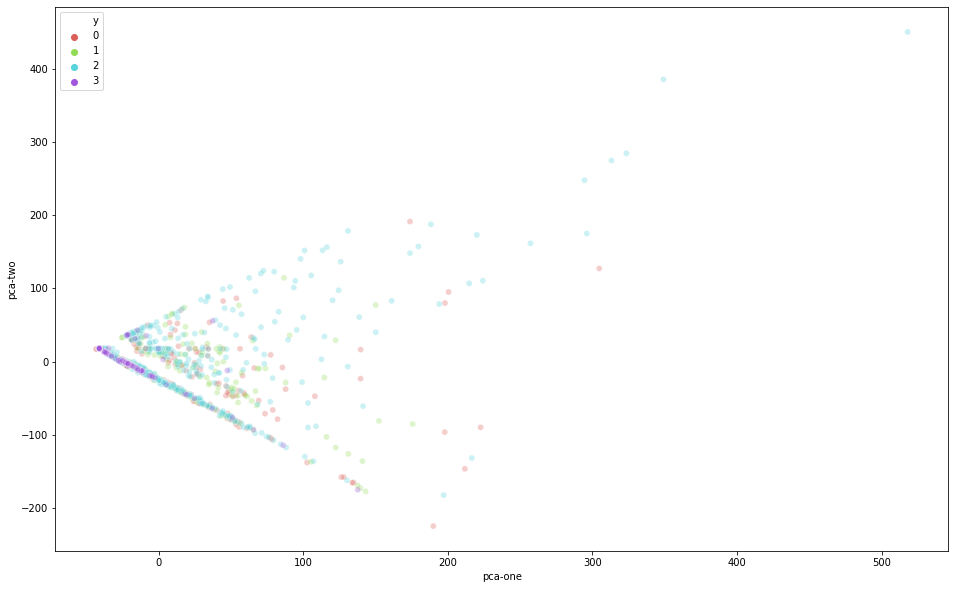

In [74]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

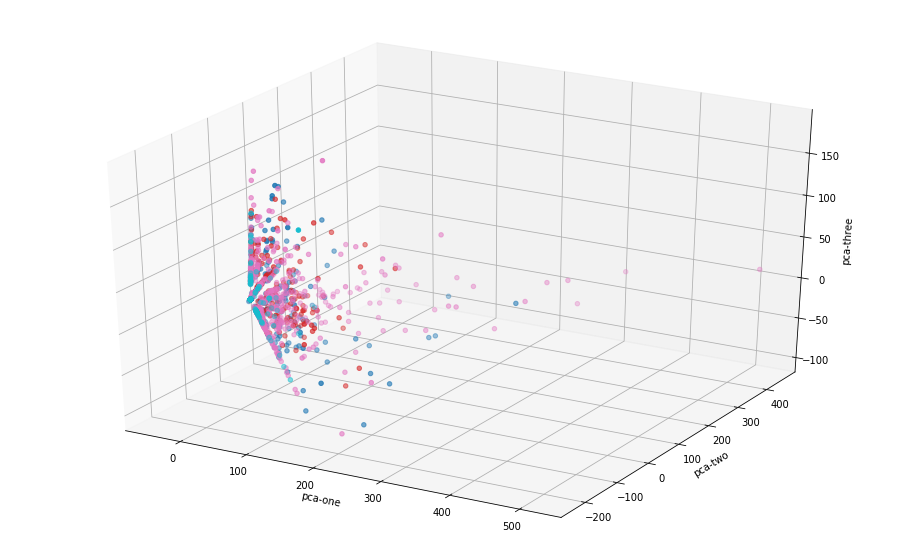

In [75]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"].astype(int), 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [76]:
N = Tl
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.35369788 0.2746221  0.13586232]


In [77]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1471 samples in 0.002s...
[t-SNE] Computed neighbors for 1471 samples in 0.081s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1471
[t-SNE] Computed conditional probabilities for sample 1471 / 1471
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.754627
[t-SNE] KL divergence after 300 iterations: 1.004418
t-SNE done! Time elapsed: 1.4917349815368652 seconds


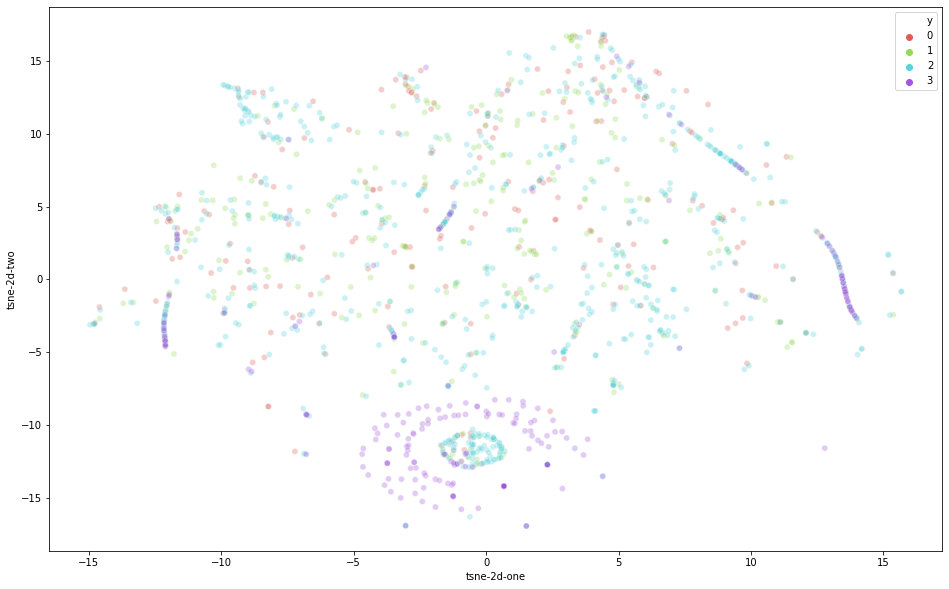

In [78]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=0.3
)

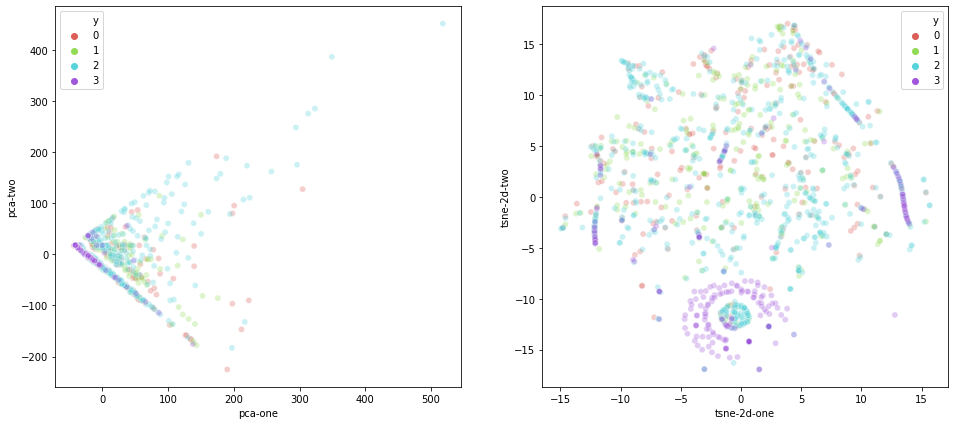

In [79]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [80]:
pca_50 = PCA(n_components=24) # 24 genes in total, so can't use 50 here
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.998580706220999
